**Αριθμός ομάδας**: Μ06

**Πρώτο μέλος**:  
Ονοματεπώνυμο: Τζε Χριστίνα-Ουρανία <br>
Αριθμός μητρώου: 03116079 <br>
Email:  xristina.rania.tze@gmail.com <br>
**Δεύτερο μέλος**: 
Ονοματεπώνυμο: Ψαρουδάκης Ανδρέας <br>
Αριθμός μητρώου: 03116001 <br>
Email: andreaspsaroudakis@gmail.com
                   

In [1]:
# Εισαγωγή απαραίτητων imports εδώ
import cv2
import skimage
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import random_noise
import scipy.ndimage as ndi
from skimage.morphology import disk
from skimage import filters
from skimage import feature
from scipy import signal
from skimage.filters import laplace

# Ερώτημα 1 (50%)

Σκοπός του πρώτου ερωτήματος της παρούσας εργαστηριακής άσκησης είναι η χρήση αλγορίθμων εύρεσης ακμών με τελικό στόχο την παραγωγή ενός **cartoonified** αποτελέσματος.

## Βήμα 1

Ξεκινάμε αρχικά δημιουργώντας την εικόνα με την οποία θα δουλέψουμε. Αυτή προκύπτει από την συνένωση δύο επιμέρους σε μία τελική. Σημειώνουμε πως επειδή οι δύο εικόνες που χρησιμοποιούμε είναι φωτογραφίες από πάσο/ταυτότητα η αλλαγή των διαστάσεών τους στις προτεινόμενες **512x288** είχε σαν αποτέλεσμα την αλλοίωσή τους σε μεγάλο βαθμό. Για τον λόγο αυτό διαβάζουμε τις εικόνες και εν συνεχεία αλλάζουμε τις διαστάσεις τους σε **288x512**. Για το διάβασμα των εικόνων χρησιμοποιούμε την συνάρτηση **imread** της cv2, ενώ για την μετατροπή των διαστάσεών τους την **resize** της ίδιας βιβλιοθήκης. Το όρισμα cv2.IMREAD_COLOR της cv2.imread μας επιτρέπει να διαβάσουμε την εικόνα ως έγχρωμη 3 καναλιών **BGR**, αλλά χωρίς διαφάνεια (alpha channel). Η OpenCV υποστηρίζει και πολλούς άλλους χρωματικούς χώρους, στους οποίους μπορούμε να μετατρέψουμε την εικόνας μας χρησιμοποιώντας την συνάρτηση **cv2.cvtColor** με ορίσματα την εικόνα εισόδου και τον τύπο της μετατροπής. Εμείς χρησιμοποιούμε αρχικά τους χρωματικούς χώρους **RGB**, **YCbCr**, **HSV** και **Gray** ενώ στο Βήμα 2 επιλέγουμε τον καταλληλότερο για την εικόνα μας.

  


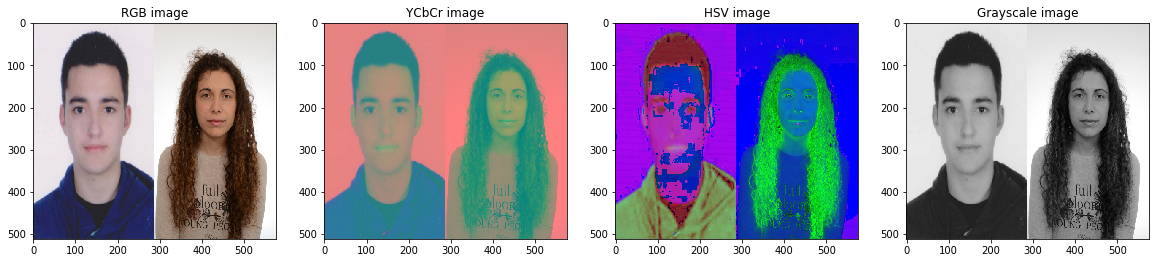

In [2]:
image1_BGR = cv2.imread('andrew.png',cv2.IMREAD_COLOR)                          # Read first image
image1_BGR = cv2.resize(image1_BGR,(288,512))                                   # Change image size to 288 (widht) x 512 (height)

image1_RGB = cv2.cvtColor(image1_BGR, cv2.COLOR_BGR2RGB)                        # Convert image from BGR to RGB 

image1_YCbCr = cv2.cvtColor(image1_BGR, cv2.COLOR_BGR2YCrCb)                    # Convert image from BGR to YCrCb 

image1_HSV = cv2.cvtColor(image1_BGR, cv2.COLOR_BGR2HSV)                        # Convert image from BGR to HSV

image1_gray = cv2.cvtColor(image1_BGR, cv2.COLOR_BGR2GRAY)                      # Convert image from BGR to grayscale
image1_gray = image1_gray.astype(np.float)/255                                  # Normalize to [0,1]  

image2_BGR = cv2.imread('rania.jpg',cv2.IMREAD_COLOR)                           # Read second image                
image2_BGR = cv2.resize(image2_BGR,(288,512))                                   # Change image size to 288 (widht) x 512 (height)


image2_RGB = cv2.cvtColor(image2_BGR, cv2.COLOR_BGR2RGB)                        # Convert image from BGR to RGB 

image2_YCbCr = cv2.cvtColor(image2_BGR, cv2.COLOR_BGR2YCrCb)                    # Convert image from BGR to YCrCb

image2_HSV = cv2.cvtColor(image2_BGR, cv2.COLOR_BGR2HSV)                        # Convert image from BGR to HSV

image2_gray = cv2.cvtColor(image2_RGB, cv2.COLOR_RGB2GRAY)                      # Convert image from BGR to grayscale
image2_gray = image2_gray.astype(np.float)/255                                  # Normalize to [0,1]  

image_RGB = np.concatenate((image1_RGB, image2_RGB), axis=1)                    # Combined RGB image

image_YCbCr = np.concatenate((image1_YCbCr, image2_YCbCr), axis=1)              # Combined YCrCb image
                             
image_HSV = np.concatenate((image1_HSV, image2_HSV), axis=1)                    # Combined HSV image

image_gray = np.concatenate((image1_gray, image2_gray), axis=1)     

#Plots
fig,axs = plt.subplots(1,4,figsize=(20,20))
axs[0].imshow(image_RGB)
axs[0].set_title("RGB image")
axs[1].imshow(image_YCbCr)
axs[1].set_title("YCbCr image")
axs[2].imshow(image_HSV)
axs[2].set_title("HSV image")
axs[3].imshow(image_gray,cmap="gray")
axs[3].set_title("Grayscale image")
plt.show()

## Βήμα 2

Στο βήμα αυτό επιλέγουμε τον κατάλληλο χρωματικό χώρο για την εικόνα μας. Αυτός είναι ο **Grayscale**. Ο κυριότερος λόγος για τον οποίο αυτός προτιμάται συχνά σε εφαρμογές επεξεργασίας εικόνας είναι επειδή παρέχει μεγάλη συμπίεση καθώς κάθε pixel αναπαριστάται με 8 μόνο bits λαμβάνοντας οποιαδήποτε τιμή από 0 (μαύρο) μέχρι 255 (άσπρο). Επομένως, στην περίπτωση των grayscale εικόνων είναι απαραίτητος ο προσδιορισμός **μίας** μόνο τιμής έντασης σε κάθε pixel, σε αντιδιαστολή με τις έγχρωμες εικόνες όπου χρειάζονται **τρείς**, μία για κάθε κανάλι. Το γεγονός αυτό έχει σαν αποτέλεσμα την μείωση της υπολογιστικής πολυπλοκότητας σε αλγορίθμους επεξεργασίας και ανάλυσης εικόνας.

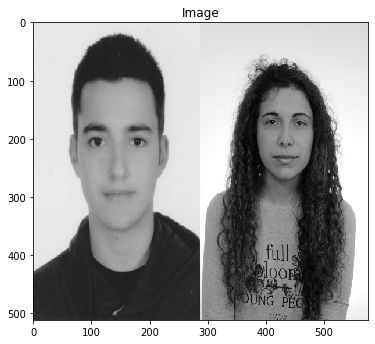

In [3]:
image = image_gray # Choose grayscale image

# Show image
fig,ax = plt.subplots(1,1,figsize=(6,6))
ax.imshow(image, cmap="gray")
ax.set_title("Image")
plt.show()

## Βήμα 3

Στο βήμα αυτό εφαρμόζουμε με χρήση της συνάρτησης **random_noise** του πακέτου `skimage.util` δύο διαφορετικά είδη θορύβου:
*   **Gaussian** θόρυβο: Στην περίπτωση αυτή σε κάθε pixel της αρχικής εικόνας προστίθενται τυχαία δείγματα μίας γκαουσιανής κατανομής. Για την προσθήκη αυτού του τύπου θορύβου καλούμε την συνάρτηση random_noise με mode = `gaussian` και   `seed` ίσο με 9 (τελευταίο ψηφίο του ΑΜ του πρώτου μέλους της ομάδας μας). 

*   **Salt and Pepper** θόρυβο: Στην περίπτωση  αυτή ένα μέρος των εικονοστοιχείων της αρχικής εικόνας υφίσταται την επίδραση του θορύβου ενώ τα υπόλοιπα παραμένουν ανεπηρέαστα (non-noisy). Κάθε pixel από τα noisy αποκτά τιμή είτε ίση με 0 (Pepper noise) είτε με 1 (Salt noise). Για την προσθήκη του 'Salt and Pepper' θορύβου χρησιμοποιούμε την συνάρτηση random_noise με mode = `s&p`, `seed` ίσο με 9 και `amount` που δίνεται από τον τύπο: <br>
  <br>
  <center>
  $amount(x)=\frac{1}{90}x + 0.3$
  </center>
  <br>
  όπου $x$ = 7 (προτελευταίο ψηφίο του ΑΜ του πρώτου μέλους της ομάδας μας)




In [4]:
def snpAmount(x):     # get 's&p' noise amount
    return x/90 + 0.3

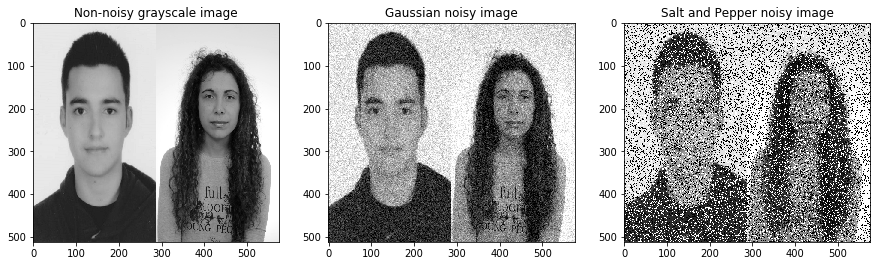

In [5]:
#Add gaussian noise
gaussian_noisy_img = random_noise(image, mode='gaussian',seed=9)

# Add salt and pepper noise
snp_noisy_img = random_noise(image, mode='s&p',seed=9, amount = snpAmount(7))

# Plots
fig,axs = plt.subplots(1,3,figsize=(15,15))
axs[0].imshow(image,cmap="gray")
axs[0].set_title("Non-noisy grayscale image")
axs[1].imshow(gaussian_noisy_img,cmap="gray")
axs[1].set_title("Gaussian noisy image")
axs[2].imshow(snp_noisy_img,cmap="gray")
axs[2].set_title("Salt and Pepper noisy image")
plt.show()

## Βήμα 4

Αφού έχουμε δημιουργήσει τις δύο θορυβώδεις εικόνες (gaussian_noisy_img και snp_noisy_img) εφαρμόζουμε τώρα σε αυτές τρία διαφορετικά είδη filtering:




*  **Mean filtering**: To φίλτρο μέσης τιμής χρησιμοποιείται για την αφαίρεση του θορύβου από μία θορυβώδη εικόνα. Συνοπτικά η διαδικασία που ακολουθείται περιλαμβάνει τον ορισμό ενός φίλτρου (που αποτελείται από έναν πυρήνα- mean_kernel) μεγέθους n x n και την εφαρμογή του πάνω στην εικόνα εισόδου. Το συγκεκριμένο φίλτρο προκαλεί λείανση των απότομων μεταβολών της έντασης της εικόνας. Οι ακμές (σύνορο μεταξύ σκοτεινών και φωτεινών εικονοστοιχείων) εξομαλύνονται επειδή τα σκοτεινά εικονοστοιχεία μειώνουν την ένταση των γειτονικών τους, ενώ τα φωτεινά κάνουν το αντίθετο. Για την εφαρμογή του φίλτρου μέσης τιμής σε μία εικόνα μπορούμε να χρησιμοποιήσουμε την έτοιμη συνάρτηση **blur** της cv2, όπως φαίνεται στο παράδειγμα παρακάτω για έναν πυρήνα μεγέθους 9 x 9: <br><br>
`# Mean filtering with cv2.blur` <br>
`figure_size = 9  # the dimension of the x and y axis of the kernel.` <br>
`gaussian_mean_filtered = cv2.blur(gaussian_noisy_img,(figure_size, figure_size))` <br>

Ακριβώς στα ίδια αποτελέσματα καταλήγουμε και με την ακόλουθη εναλλακτική υλοποίηση που παρουσιάστηκε και στο εργαστήριο.

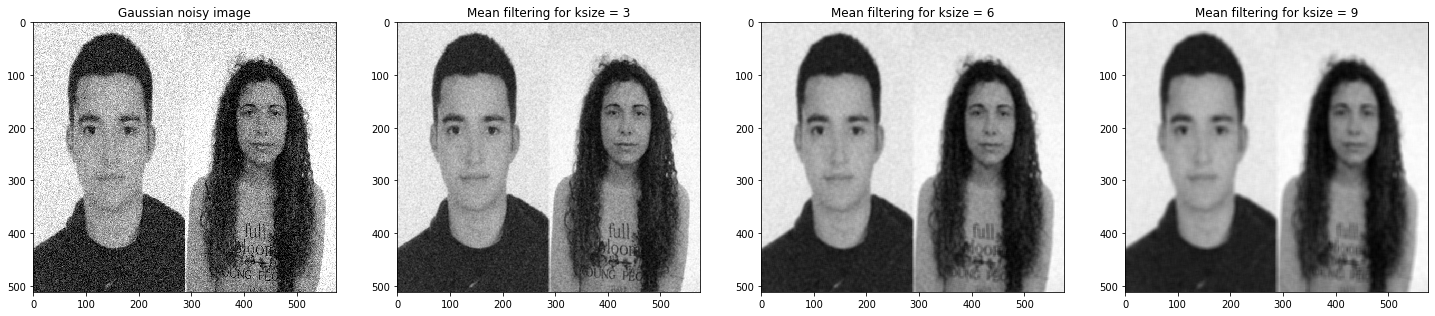

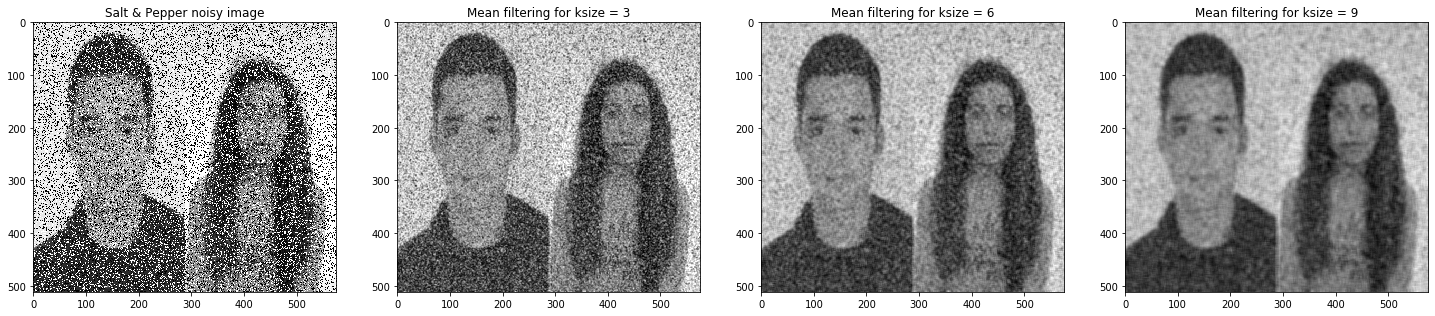

In [6]:
# Define different mean kernels
mean_kernel1 = np.full((3,3),1/9)
mean_kernel2 = np.full((6,6),1/36)
mean_kernel3 = np.full((9, 9), 1/81)

# Apply mean filtering on s&p noisy image
snp_mean_filtered1 = ndi.correlate(snp_noisy_img, mean_kernel1)
snp_mean_filtered2 = ndi.correlate(snp_noisy_img, mean_kernel2)
snp_mean_filtered3 = ndi.correlate(snp_noisy_img, mean_kernel3)

# Apply mean filtering on gaussian noisy image
gaussian_mean_filtered1 = ndi.correlate(gaussian_noisy_img, mean_kernel1)
gaussian_mean_filtered2 = ndi.correlate(gaussian_noisy_img, mean_kernel2)
gaussian_mean_filtered3 = ndi.correlate(gaussian_noisy_img, mean_kernel3)

# Plots for denoised gaussian_noisy_img
fig,axs = plt.subplots(1,4,figsize=(25,25))
axs[0].imshow(gaussian_noisy_img,cmap="gray")
axs[0].set_title("Gaussian noisy image")
axs[1].imshow(gaussian_mean_filtered1,cmap="gray")
axs[1].set_title("Mean filtering for ksize = 3")
axs[2].imshow(gaussian_mean_filtered2,cmap="gray")
axs[2].set_title("Mean filtering for ksize = 6")
axs[3].imshow(gaussian_mean_filtered3,cmap="gray")
axs[3].set_title("Mean filtering for ksize = 9")
plt.show()

# Plots for denoised snp_noisy_img
fig,axs = plt.subplots(1,4,figsize=(25,25))
axs[0].imshow(snp_noisy_img,cmap="gray")
axs[0].set_title("Salt & Pepper noisy image")
axs[1].imshow(snp_mean_filtered1,cmap="gray")
axs[1].set_title("Mean filtering for ksize = 3")
axs[2].imshow(snp_mean_filtered2,cmap="gray")
axs[2].set_title("Mean filtering for ksize = 6")
axs[3].imshow(snp_mean_filtered3,cmap="gray")
axs[3].set_title("Mean filtering for ksize = 9")
plt.show()

Παρατηρούμε ότι καθώς το μέγεθος του πυρήνα, ksize, αυξάνεται η εικόνα θολώνει όλο και περισσότερο. Το καλύτερο αποτέλεσμα προκύπτει για **ksize = 6** όπου φαίνεται να έχει απομακρυνθεί κάποιος θόρυβος, χωρίς επιπλέον να έχει αλλοιωθεί αρκετά η εικόνα. Για ksize > 6 η εικόνα έχει θολώσει αρκετά ενώ αρχίζουν να χάνονται ορισμένα βασικά χαρακτηριστικά των προσώπων. Τέλος, για ksize = 3 δεν γίνεται καλή αποθορυβοποίηση καθώς έχει απομείνει αρκετός θόρυβος.

In [7]:
snp_mean_filtered = snp_mean_filtered2   # Best denoising results for ksize = 6
gaussian_mean_filtered = gaussian_mean_filtered2  # Best denoising results for ksize = 6



*   **Median filtering**: Το φίλτρο ενδιάμεσης τιμής είναι το κλασικό φίλτρο προστασίας των ακμών. Παίρνει το σύνολο των εικονοστοιχείων που αντιστοιχούν σε έναν πυρήνα και επιστρέφει τη διάμεση τιμή εντός αυτής της γειτονιάς.
Επειδή οι περιοχές κοντά σε ακμές θα έχουν πολλές σκοτεινές τιμές και πολλές τιμές φωτεινότητας (σχετικά χωρισμένες σε 2 ομάδες τιμών), ο διάμεσος σε μια ακμή θα είναι πιθανότατα είτε ανοιχτόχρωμος είτε σκοτεινός, αντί για ενδιάμεση τιμή μεταξύ τους. Με αυτόν τον τρόπο δεν εξομαλύνουμε ακμές.



C:\Users\Rania\anaconda3\envs\cv_lab1_env\lib\site-packages\IPython\core\interactiveshell.py:3331: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


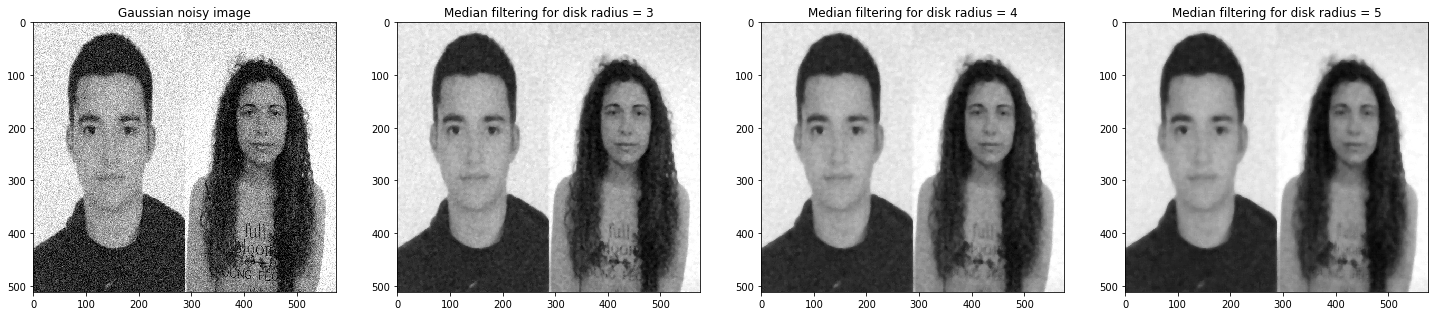

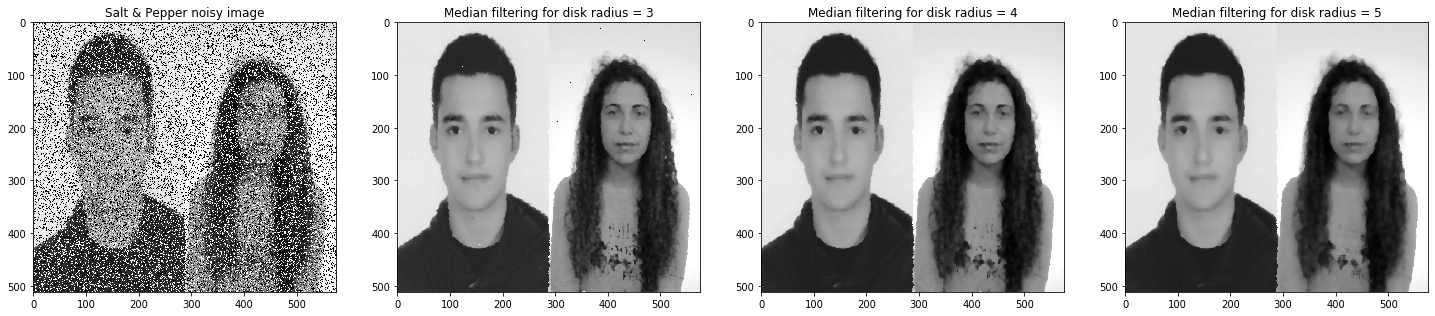

In [8]:
# Define different median filter kernels
neighborhood1 = disk(radius=3)
neighborhood2 = disk(radius=4)
neighborhood3 = disk(radius=5)

# Apply median filtering on s&p noisy image
snp_median_filtered1 = filters.rank.median(snp_noisy_img, neighborhood1)
snp_median_filtered2 = filters.rank.median(snp_noisy_img, neighborhood2)
snp_median_filtered3 = filters.rank.median(snp_noisy_img, neighborhood3)

# Apply median filtering on gaussian noisy image
gaussian_median_filtered1 = filters.rank.median(gaussian_noisy_img, neighborhood1)
gaussian_median_filtered2 = filters.rank.median(gaussian_noisy_img, neighborhood2)
gaussian_median_filtered3 = filters.rank.median(gaussian_noisy_img, neighborhood3)

# Plots for denoised gaussian_noisy_img
fig,axs = plt.subplots(1,4,figsize=(25,25))
axs[0].imshow(gaussian_noisy_img,cmap="gray")
axs[0].set_title("Gaussian noisy image")
axs[1].imshow(gaussian_median_filtered1,cmap="gray")
axs[1].set_title("Median filtering for disk radius = 3")
axs[2].imshow(gaussian_median_filtered2,cmap="gray")
axs[2].set_title("Median filtering for disk radius = 4")
axs[3].imshow(gaussian_median_filtered3,cmap="gray")
axs[3].set_title("Median filtering for disk radius = 5")
plt.show()

# Plots for denoised snp_noisy_img
fig,axs = plt.subplots(1,4,figsize=(25,25))
axs[0].imshow(snp_noisy_img,cmap="gray")
axs[0].set_title("Salt & Pepper noisy image")
axs[1].imshow(snp_median_filtered1,cmap="gray")
axs[1].set_title("Median filtering for disk radius = 3")
axs[2].imshow(snp_median_filtered2,cmap="gray")
axs[2].set_title("Median filtering for disk radius = 4")
axs[3].imshow(snp_median_filtered3,cmap="gray")
axs[3].set_title("Median filtering for disk radius = 5")
plt.show()

Παρατηρούμε ότι το καλύτερο αποτέλεσμα προκύπτει για **δίσκο ακτίνας 4**. Για disk radius < 4 φαίνεται να μην έχει εξαλειφθεί πλήρως ο θόρυβος (βλ. πρώτη αποθορυβοποιημένη εικόνα της s&p noisy image) ενώ για disk radius > 5 η εικόνα γίνεται όλο και πιο θολή με αποτέλεσμα να αλλοιώνονται τα χαρακτηριστικά και των δύο προσώπων. 

In [9]:
snp_median_filtered = snp_median_filtered2 # Best denoising results for disk radius =  4
gaussian_median_filtered = gaussian_median_filtered2 # Best denoising results for disk radius =  4



*   **Gaussian filtering**: Το Gaussian filter είναι ένα κλασικό βαθυπερατό φίλτρο στην επεξεργασία εικόνας, παρόμοιο με το μέσης τιμής. Ο πυρήνας του αποτελεί μία διακριτή προσέγγιση μίας γκαουσιανής κατανομής και δίνει διαβαθμισμένη βαρύτητα στα εικονοστοιχεία με τα οποία συνελίσσεται. Για ένα pixel που βρίσκεται στην $r$ γραμμή και στην $c$ στήλη του αυτός είναι: <br>
<br>
$$
k_{r, c} = \frac{1}{2\pi \sigma^2} \exp{\left(-\frac{r^2 + c^2}{2\sigma^2}\right)}
$$


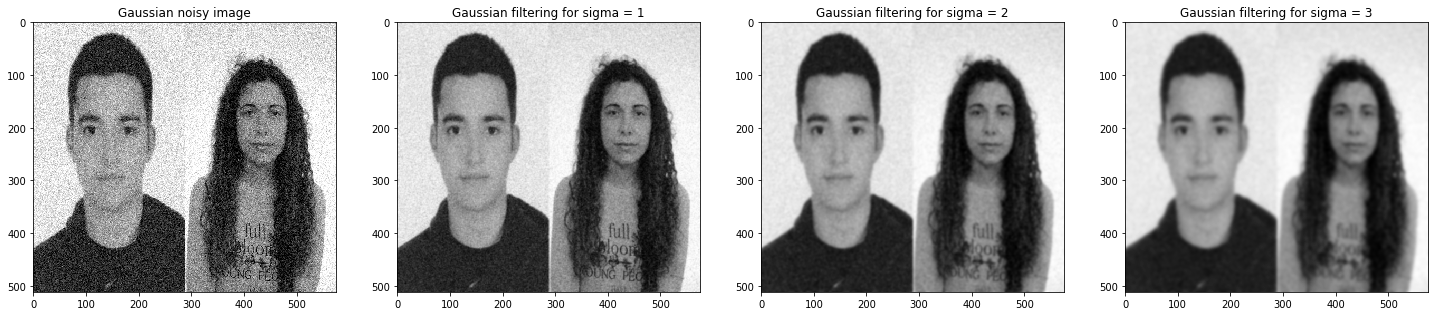

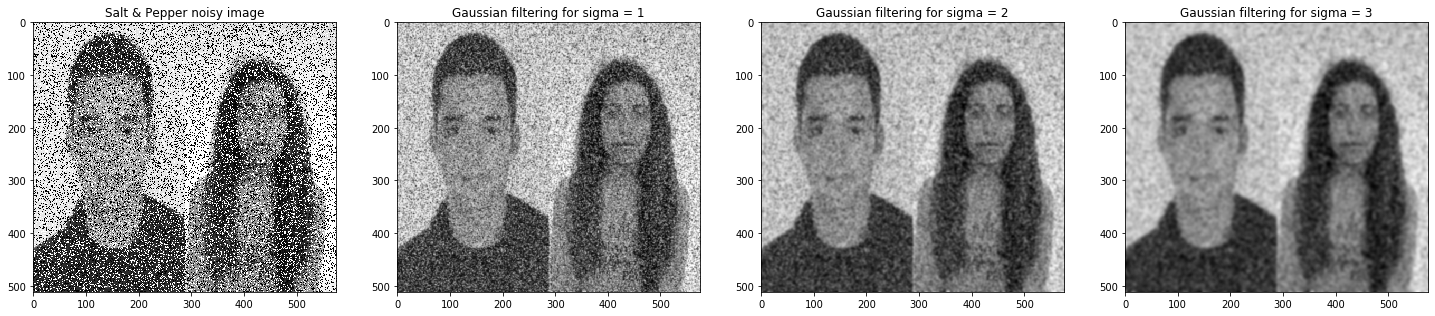

In [10]:
# Define different sigmas
sigma1 = 1
sigma2 = 2
sigma3 = 3

# Apply gaussian filtering on s&p noisy image
snp_gauss_filtered1 = filters.gaussian(snp_noisy_img, sigma1)
snp_gauss_filtered2 = filters.gaussian(snp_noisy_img, sigma2)
snp_gauss_filtered3 = filters.gaussian(snp_noisy_img, sigma3)

# Apply gaussian filtering on gaussian noisy image
gaussian_gauss_filtered1 = filters.gaussian(gaussian_noisy_img, sigma1)
gaussian_gauss_filtered2 = filters.gaussian(gaussian_noisy_img, sigma2)
gaussian_gauss_filtered3 = filters.gaussian(gaussian_noisy_img, sigma3)

# Plots for denoised gaussian_noisy_img
fig,axs = plt.subplots(1,4,figsize=(25,25))
axs[0].imshow(gaussian_noisy_img,cmap="gray")
axs[0].set_title("Gaussian noisy image")
axs[1].imshow(gaussian_gauss_filtered1,cmap="gray")
axs[1].set_title("Gaussian filtering for sigma = 1")
axs[2].imshow(gaussian_gauss_filtered2,cmap="gray")
axs[2].set_title("Gaussian filtering for sigma = 2")
axs[3].imshow(gaussian_gauss_filtered3,cmap="gray")
axs[3].set_title("Gaussian filtering for sigma = 3")
plt.show()

# Plots for denoised snp_noisy_img
fig,axs = plt.subplots(1,4,figsize=(25,25))
axs[0].imshow(snp_noisy_img,cmap="gray")
axs[0].set_title("Salt & Pepper noisy image")
axs[1].imshow(snp_gauss_filtered1,cmap="gray")
axs[1].set_title("Gaussian filtering for sigma = 1")
axs[2].imshow(snp_gauss_filtered2,cmap="gray")
axs[2].set_title("Gaussian filtering for sigma = 2")
axs[3].imshow(snp_gauss_filtered3,cmap="gray")
axs[3].set_title("Gaussian filtering for sigma = 3")
plt.show()


Παρατηρούμε ότι καθώς το $σ$ αυξάνεται η εικόνα που προκύπτει είναι μία όλο και πιο εξομαλυμένη εκδοχή της αρχικής. Το γεγονός αυτό είναι αναμενόμενο καθώς συνελίσσουμε την εικόνα με μία γκαουσιανή μεγαλύτερης τυπικής απόκλισης. Για $σ=1$ το αποτέλεσμα της αποθορυβοποίησης δεν είναι καθόλου ικανοποιητικό εφόσον έχει παραμείνει αρκετός θόρυβος. Το καλύτερο αποτέλεσμα φαίνεται να προκύπτει για  $σ = 3$ όπου η εικόνα είναι πιο θολή από ότι για $σ = 2$ αλλά έχει εξαλειφθεί περισσότερος θόρυβος.

In [11]:
snp_gauss_filtered = snp_gauss_filtered3 # Best denoising results for σ = 3
gaussian_gauss_filtered = gaussian_gauss_filtered3 # Best denoising results for σ = 3

## Βήμα 5

Αφού εφαρμόσαμε και στις δύο εικόνες θορύβου τρία διαφορετικά είδη filtering (mean,median,gaussian) επιλέγουμε για κάθε μία από αυτές το καλύτερο αποτέλεσμα αποθορυβοποίησης. Συγκεκριμένα, στην περίπτωση του "salt and pepper" θορύβου το καλύτερο αποτέλεσμα προκύπτει από την εφαρμογή του φίλτρου ενδιάμεσης τιμής. Το γεγονός αυτό είναι αναμενόμενο εφόσον γνωρίζουμε ότι το median φίλτρο είναι ιδανικό για την εξαγωγή τέτοιου είδους θορύβου. Για τον "gaussian" θόρυβο τα καλύτερα αποτελέσματα προκύπτουν με εφαρμογή τόσο του mean filtering όσο και 
του gaussian. Αυτό αιτιολογείται καθώς όπως έχουμε ήδη αναφέρει τα δύο αυτά είδη filtering έχουν παρόμοια αποτελέσματα. Ωστόσο, ενώ ένα φίλτρο τύπου gaussian θολώνει την εικόνα, όπως και ένα φίλτρο μέσης τιμής, πετυχαίνει καλύτερα την διατήρηση των ακμών της εικόνας. Για τον λόγο αυτό στην περίπτωση της εικόνας gaussian θορύβου επιλέγουμε τελικά ως καλύτερο αποτέλεσμα αποθορυβοποίησης την εικόνα που προκύπτει ύστερα από εφαρμογή του gaussian φίλτρου. Στην συνέχεια εφαρμόζουμε στις εικόνες που επιλέξαμε για κάθε ένα από τα δύο διαφορετικά είδη θορύβου τους ανιχνευτές ακμών **Canny**, **Laplacian** και **Marr-Hildreth** .





*   **Canny Edge Detector**: Ο ανιχνευτής ακμών Canny αποσκοπεί στην υλοποίηση βασικών στόχων, όπως χαμηλό ρυθμό σφαλμάτων (ανίχνευση ακμών όσο πιο κοντά στις πραγματικές ακμές, όχι ανίχνευση πλασματικών ακμών) και μικρό πλήθος τοπικών μεγίστων γύρω από την πραγματική ακμή. Τα βήματα που ακολουθεί ο Canny για να παράγει μία δυαδική εικόνα ακμών είναι συνοπτικά τα εξής:

 1.   Gaussian φίλτρο
 2.   Sobel φίλτρο
 3.   Εξομάλυνση μη μεγίστων (Non-maximal suppression)
 4.   Κατάτμηση υστέρησης (Hysteresis thresholding)

  Για την εφαρμογή του ανιχνευτή ακμών Canny χρησιμοποιούμε την έτοιμη συνάρτηση **feature.canny** της skimage με ορίσματα την τυπική απόκλιση, sigma, του γκαουσιανού φίλτρου και την grayscale εικόνα της οποίας τις ακμές θέλουμε να ανιχνεύσουμε.


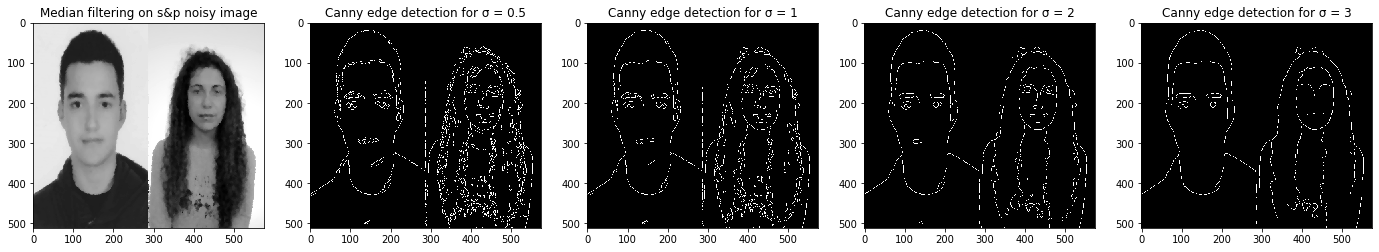

In [12]:
# Canny edges on snp_median_filtered image
snp_canny_edges1 = feature.canny(snp_median_filtered, sigma=0.5)
snp_canny_edges2 = feature.canny(snp_median_filtered, sigma=1)
snp_canny_edges3 = feature.canny(snp_median_filtered, sigma=2)
snp_canny_edges4 = feature.canny(snp_median_filtered, sigma=3)

# Plots
fig,axs = plt.subplots(1,5,figsize=(24,24))
axs[0].imshow(snp_median_filtered,cmap="gray")
axs[0].set_title("Median filtering on s&p noisy image")
axs[1].imshow(snp_canny_edges1,cmap="gray")
axs[1].set_title("Canny edge detection for σ = 0.5")
axs[2].imshow(snp_canny_edges2,cmap="gray")
axs[2].set_title("Canny edge detection for σ = 1")
axs[3].imshow(snp_canny_edges3,cmap="gray")
axs[3].set_title("Canny edge detection for σ = 2")
axs[4].imshow(snp_canny_edges4,cmap="gray")
axs[4].set_title("Canny edge detection for σ = 3")
plt.show()


Παρατηρούμε ότι το καλύτερο αποτέλεσμα προκύπτει για $σ = 1$. Για $σ > 1$ αρχίζουν να χάνονται ορισμένες ακμές όπως πχ. το στόμα (για $σ = 2$), τα μάτια και το πιγούνι (για $σ = 3$). Αντίθετα, για $σ < 1$ εντοπίζονται πάρα πολλές ακμές μερικές εκ των οποίων δεν αντιστοιχούν σε πραγματικές. 

In [13]:
snp_canny = snp_canny_edges2  # Best edge detection for σ = 2

In [ ]:
# Canny edges on gaussian_gauss_filtered image
gaussian_canny_edges1 = feature.canny(gaussian_gauss_filtered, sigma=0.5)
gaussian_canny_edges2 = feature.canny(gaussian_gauss_filtered, sigma=1)
gaussian_canny_edges3 = feature.canny(gaussian_gauss_filtered, sigma=2)
gaussian_canny_edges4 = feature.canny(gaussian_gauss_filtered, sigma=3)

# Plots
fig,axs = plt.subplots(1,5,figsize=(24,24))
axs[0].imshow(gaussian_gauss_filtered,cmap="gray")
axs[0].set_title("Gaussian filtering on gaussian noisy image")
axs[1].imshow(gaussian_canny_edges1,cmap="gray")
axs[1].set_title("Canny edge detection for σ = 0.5")
axs[2].imshow(gaussian_canny_edges2,cmap="gray")
axs[2].set_title("Canny edge detection for σ = 1")
axs[3].imshow(gaussian_canny_edges3,cmap="gray")
axs[3].set_title("Canny edge detection for σ = 2")
axs[4].imshow(gaussian_canny_edges4,cmap="gray")
axs[4].set_title("Canny edge detection for σ = 3")
plt.show()

Παρατηρούμε ότι για καμία παραμετρικοποίηση δεν κατέστη δυνατός ο εντοπισμός του στόματος για το αριστερό πρόσωπο της συνδυασμένης εικόνας. Με βάση τα αποτελέσματα ανίχνευσης για το δεύτερο πρόσωπο (καθώς για το άλλο δεν παρατηρούμε κάποια ιδιαίτερη αλλαγή με βάση τις παραμέτρους) καταλήγουμε ότι το καλύτερο αποτέλεσμα προκύπτει για τιμή του $σ$ ίση με 0.5 καθώς για $σ > 0.5$ αρχίζουν να μην ανιχνεύονται ακμές πχ. χειλιών (για $σ = 1$) και ματιών (για $σ > 1$).     

In [ ]:
gaussian_canny = gaussian_canny_edges1  # Best edge detection for σ = 0.5



*   **Laplacian Edge Detector** : Για τον ανιχνευτή ακμών Laplacian χρησιμοποιούμε την έτοιμη συνάρτηση **filters.laplace** της skimage με όρισμα την εικόνα της οποίας τις ακμές θέλουμε να εντοπίσουμε και το μέγεθος, ksize, του πυρήνα. Στην συνέχεια με χρήση της **clip** της βιβλιοθήκης numpy περιορίζουμε τις τιμές του αποτελέσματος στο διάστημα `[0,1]` (τιμές μικρότερες από 0 γίνονται 0 ενώ τιμές μεγαλύτερες από 1 γίνονται 1). Επειδή ύστερα από πειραματισμούς με το μέγεθος του πυρήνα τα αποτελέσματα ανίχνευσης που λαμβάνουμε δεν είναι ικανοποιητικά (συγκεκριμένα είναι πολύ 'σκοτεινά') δοκιμάζουμε να εφαρμόσουμε σε αυτά μία κατωφλιοποίηση (thresholding) για να τονίσουμε περισσότερο τις ακμές του προσώπου, των ματιών κτλ. 



In [ ]:
# Apply Laplacian edge detector on snp_median_filtered
snp_laplacian1 = np.clip(filters.laplace(snp_median_filtered,ksize=3), 0, 1)
snp_laplacian2 = np.clip(filters.laplace(snp_median_filtered,ksize=5), 0, 1)
snp_laplacian3 = np.clip(filters.laplace(snp_median_filtered,ksize=7), 0, 1)

# Plots of laplacian edge detection without thresholding
fig,axs = plt.subplots(1,4,figsize=(20,20))
axs[0].imshow(snp_median_filtered,cmap="gray")
axs[0].set_title("Median filtering on s&p noisy image")
axs[1].imshow(snp_laplacian1,cmap="gray")
axs[1].set_title("Laplacian edge detection for ksize=3")
axs[2].imshow(snp_laplacian2,cmap="gray")
axs[2].set_title("Laplacian edge detection for ksize=5")
axs[3].imshow(snp_laplacian3,cmap="gray")
axs[3].set_title("Laplacian edge detection for ksize=7")
plt.show()

# Apply thrsholding for better results
snp_laplacian1_threshold = (snp_laplacian1 > 0.01)  
snp_laplacian2_threshold = (snp_laplacian1 > 0.04)
snp_laplacian3_threshold = (snp_laplacian1 > 0.09)

# Plots of laplacian edge detection after thresholding
fig,axs = plt.subplots(1,4,figsize=(20,20))
axs[0].imshow(snp_median_filtered,cmap="gray")
axs[0].set_title("Median filtering on s&p noisy image")
axs[1].imshow(snp_laplacian1_threshold,cmap="gray")
axs[1].set_title("Laplacian edge detection for threshold=0.01")
axs[2].imshow(snp_laplacian2_threshold,cmap="gray")
axs[2].set_title("Laplacian edge detection for threshold=0.04")
axs[3].imshow(snp_laplacian3_threshold,cmap="gray")
axs[3].set_title("Laplacian edge detection for threshold=0.09")
plt.show()


Παρατηρούμε, όπως ήδη αναφέραμε, πως τα αποτελέσματα της Laplacian ανίχνευσης ακμών δεν είναι ικανοποιητικά καθώς οι όποιες ακμές έχουν ανιχνευθεί είναι αρκετά αχνές και διακρίνονται με δυσκολία. Επιπλέον, το μέγεθος του πυρήνα (ksize) δεν φαίνεται να επηρεάζει το αποτέλεσμα. Πραγματοποιώντας μία κατωφλιοποίηση τα αποτελέσματα που λαμβάνουμε είναι αρκετά πιο ικανοποιητικά. Αναφορικά με το κατώφλι η καλύτερη τιμή είναι ίση με 0.04, καθώς για τιμές μικρότερες από αυτή φαίνεται να ανιχνεύεται πολύς θόρυβος. Αντίθετα για τιμές μεγαλύτερες από 0.04 παύουν να ανιχνεύονται ορισμένες ακμές, όπως πχ. των χειλιών, των ματιών κτλ.   

In [ ]:
snp_laplacian = snp_laplacian2_threshold # Best edge detection for threshold = 0.04

In [ ]:
# Apply Laplacian edge detector on gaussian_gauss_filtered
gaussian_laplacian1 = np.clip(filters.laplace(gaussian_gauss_filtered,ksize=3), 0, 1)
gaussian_laplacian2 = np.clip(filters.laplace(gaussian_gauss_filtered,ksize=5), 0, 1)
gaussian_laplacian3 = np.clip(filters.laplace(gaussian_gauss_filtered,ksize=7), 0, 1)

# Plots of laplacian edge detection without thresholding
fig,axs = plt.subplots(1,4,figsize=(20,20))
axs[0].imshow(gaussian_gauss_filtered,cmap="gray")
axs[0].set_title("Gaussian filtering on gaussian noisy image")
axs[1].imshow(gaussian_laplacian1,cmap="gray")
axs[1].set_title("Laplacian edge detection for ksize=3")
axs[2].imshow(gaussian_laplacian2,cmap="gray")
axs[2].set_title("Laplacian edge detection for ksize=5")
axs[3].imshow(gaussian_laplacian3,cmap="gray")
axs[3].set_title("Laplacian edge detection for ksize=7")
plt.show()

laplacian = gaussian_laplacian1

# Apply thrsholding for better results
gaussian_laplacian1 = (laplacian > 0.004)  
gaussian_laplacian2 = (laplacian > 0.01)
gaussian_laplacian3 = (laplacian > 0.02)

# Plots of laplacian edge detection after thresholding
fig,axs = plt.subplots(1,4,figsize=(20,20))
axs[0].imshow(gaussian_gauss_filtered,cmap="gray")
axs[0].set_title("Gaussian filtering on gaussian noisy image")
axs[1].imshow(gaussian_laplacian1,cmap="gray")
axs[1].set_title("Laplacian edge detection for threshold=0.004")
axs[2].imshow(gaussian_laplacian2,cmap="gray")
axs[2].set_title("Laplacian edge detection for threshold=0.01")
axs[3].imshow(gaussian_laplacian3,cmap="gray")
axs[3].set_title("Laplacian edge detection for threshold=0.02")
plt.show()


Παρατηρούμε πως και σε αυτή την περίπτωση η μεταβολή του μεγέθους του πυρήνα δεν φαίνεται να έχει κάποια ιδιαίτερη επίδραση στο αποτέλεσμα ανίχνευσης. Επιπλέον, για την gaussian εικόνα θορύβου αποθορυβοποιημένη με gaussian filtering δεν μπορούμε να πετύχουμε ικανοποιητικό αποτέλεσμα εφαρμόζοντας κάποια κατωφλιοποίηση. Αυτό συμβαίνει γιατί σε σχέση με την αποθορυβοποιημένη s&p εικόνα, ο θόρυβος που έχει παραμείνει είναι αρκετός. Επομένως, για μικρή τιμή κατωφλίου, πχ. για $σ < 0.004 $ εντοπίζονται λανθασμένα ως pixel ακμών pixels που αντιστοιχούν σε θόρυβο. Αντίθετα για μεγάλες τιμές κατωφλίου, πχ. μεγαλύτερες από 0.04, ανιχνεύονται από ελάχιστες ακμές μέχρι καμία (βλ. $σ = 0.02$). Συνεπώς, μπορούμε να πούμε πως το καλύτερο αποτέλεσμα προκύπτει για μέγεθος πυρήνα 3 (θα μπορούσαμε να είχαμε διαλέξει και ksize = 5 ή 7) χωρίς κάποια κατωφλιοποίηση.

In [ ]:
gaussian_laplacian = laplacian # Best edge detection for ksize = 3 without thresholding


*   **Marr-Hildreth Εdge Detection**: Τα βήματα υπολογισμού του αλγορίθμου ανίχνευσης ακμών Marr-Hildreth συνοψίζονται παρακάτω:

  1.   Φιλτράρισμα της εικόνας εισόδου με ένα Gaussian lowpass filter
  2.   Υπολογισμός της Laplacian της εικόνας που δημιουργήθηκε στο βήμα 1 
  3.   Προσδιορισμός των σημείων διέλευσης από το μηδέν (zero crossings) της εικόνας που δημιουργήθηκε στο Βήμα 2

 Επειδή ισχύει η σχέση: <br>
 <br>
 <center>
 $\nabla^2 (G \ast f) = \nabla^2G \ast f$
 </center>
 <br>
τα βήματα 1-2 αντιστοιχούν απλά στην συνέλιξη της εικόνας εισόδου με τον τελεστή Laplacian of Gaussian, LoG, ή τελεστή Μεξικάνικου καπέλου: 
<center>
$LoG:  \nabla^2 G(x,y)=[\frac{x^2+y^2-2σ^2}{σ^4}]\ e^{-\frac{x^2+y^2}{2σ^2}}  (1)$
</center>

 Η υλοποίηση του Marr-Hildreth ανιχνευτή ακμών πραγματοποιείται εντός της    συνάρτησης **edgesMarrHildreth** η οποία δέχεται για ορίσματα την εικόνα εισόδου και την τυπική απόκλιση, sigma, της γκαουσιανής. Αρχικά, ορίζουμε σύμφωνα με την (1) το πυρήνα της LoG και εν συνεχεία τον συνελίσσουμε με την εικόνα. Για την εφαρμογή της 2Δ συνέλιξης χρησιμοποιούμε την έτοιμη συνάρτηση **signal.convolve2d** της scipy με mode = `same` ώστε το αποτέλεσμα της συνέλιξης να είναι ένα πίνακας ίδιων διαστάσεων με την αρχική εικόνα. Τέλος, βρίσκουμε και επιστρέφουμε τα zero crossings.


In [ ]:
def edgesMarrHildreth(img, sigma):

    n = int(2*(np.ceil(3*sigma))+1)

    x, y = np.meshgrid(np.arange(-n/2+1, n/2+1), np.arange(-n/2+1, n/2+1))

    # LoG filter
    kernel = ((x**2 + y**2 - (2.0*sigma**2)) / sigma**4) * np.exp(-(x**2 + y**2)/(2.0*sigma**2))

    kern_size = kernel.shape[0]
    log = np.zeros_like(img, dtype=float)

    # Apply kernel
    log = signal.convolve2d(img, kernel, mode='same')    
  
    zero_crossing = np.zeros_like(log)

    # computing zero crossing
    for i in range(log.shape[0]-(kern_size-1)):
        for j in range(log.shape[1]-(kern_size-1)):
            if log[i][j] == 0:
                if (log[i][j-1] < 0 and log[i][j+1] > 0) or (log[i][j-1] < 0 and log[i][j+1] < 0) or (log[i-1][j] < 0 and log[i+1][j] > 0) or (log[i-1][j] > 0 and log[i+1][j] < 0):
                    zero_crossing[i][j] = 1
            if log[i][j] < 0:
                if (log[i][j-1] > 0) or (log[i][j+1] > 0) or (log[i-1][j] > 0) or (log[i+1][j] > 0):
                    zero_crossing[i][j] = 1
    
    return zero_crossing


In [ ]:
# Apply Marr-Hildreth edge detector on snp_median_filtered
snp_zc1 = edgesMarrHildreth(snp_median_filtered, sigma= 0.9)
snp_zc2 = edgesMarrHildreth(snp_median_filtered, sigma= 1)
snp_zc3 = edgesMarrHildreth(snp_median_filtered, sigma= 2)
snp_zc4 = edgesMarrHildreth(snp_median_filtered, sigma= 4)

# Plots
fig,axs = plt.subplots(1,5,figsize=(25,25))
axs[0].imshow(snp_median_filtered,cmap="gray")
axs[0].set_title("Median filtering on s&p noisy image")
axs[1].imshow(snp_zc1,cmap="gray")
axs[1].set_title("Marr-Hildreth edge detection for σ = 0.9")
axs[2].imshow(snp_zc2,cmap="gray")
axs[2].set_title("Marr-Hildreth edge detection for σ = 1")
axs[3].imshow(snp_zc3,cmap="gray")
axs[3].set_title("Marr-Hildreth edge detection for σ = 2")
axs[4].imshow(snp_zc4,cmap="gray")
axs[4].set_title("Marr-Hildreth edge detection for σ = 4")
plt.show()

Παρατηρούμε πως το καλύτερο αποτέλεσμα προκύπτει για $σ = 4$ καθώς ανιχνεύονται ικανοποιητικά όλες οι ακμές και των δύο προσώπων. Για τιμές του $σ$ μικρότερες από 4 φαίνεται να υπάρχει αρκετός θόρυβος στο αποτέλεσμα ανίχνευσης.

In [ ]:
snp_marr_hildreth = snp_zc4 # Best edge detection for σ = 4

In [ ]:
# Apply Marr-Hildreth edge detector on gaussian_gauss_filtered
gaussian_zc1 = edgesMarrHildreth(gaussian_gauss_filtered, sigma= 0.9)
gaussian_zc2 = edgesMarrHildreth(gaussian_gauss_filtered, sigma= 1)
gaussian_zc3 = edgesMarrHildreth(gaussian_gauss_filtered, sigma= 2)
gaussian_zc4 = edgesMarrHildreth(gaussian_gauss_filtered, sigma= 4)

# Plots
fig,axs = plt.subplots(1,5,figsize=(25,25))
axs[0].imshow(gaussian_gauss_filtered,cmap="gray")
axs[0].set_title("Gaussian filtering on gaussian noisy image")
axs[1].imshow(gaussian_zc1,cmap="gray")
axs[1].set_title("Marr-Hildreth edge detection for σ = 0.9")
axs[2].imshow(gaussian_zc2,cmap="gray")
axs[2].set_title("Marr-Hildreth edge detection for σ = 1")
axs[3].imshow(gaussian_zc3,cmap="gray")
axs[3].set_title("Marr-Hildreth edge detection for σ = 2")
axs[4].imshow(gaussian_zc4,cmap="gray")
axs[4].set_title("Marr-Hildreth edge detection for σ = 4")
plt.show()

Παρατηρούμε πως στην περίπτωση της αποθορυβοποιημένης gaussian εικόνας θορύβου τα αποτελέσματα ανίχνευσης δεν είναι τόσο ικανοποιητικά όσο αυτά της s&p εικόνας. Ακόμα και για μεγάλες τιμές της τυπικής απόκλισης $σ$, όπως πχ. για $σ = 4$ φαίνεται να εντοπίζονται λανθασμένα ως pixels ακμών ορισμένα pixels θορύβου (βλ. κοντά στην περιοχή της μπλούζας). Ωστόσο, μεταξύ των τεσσάρων διαφορετικών τιμών της παραμέτρου $σ$ μπορούμε να πούμε πως το καλύτερο αποτέλεσμα προκύπτει για $σ = 4$ όπου ο θόρυβος είναι λιγότερος σε σχέση με τις άλλες περιπτώσεις ενώ επιπλέον έχουν ανιχνευθεί ικανοποιητικά οι ακμές των προσώπων (πχ. μάτια, μύτη, στόμα, πιγούνι κτλ).

In [ ]:
gaussian_marr_hildreth = gaussian_zc4 # Best edge detection for σ = 4

## Βήμα 6

Σαν τελευταίο βήμα δημιουργούμε μία συνάρτηση με όνομα **cartoonify** η οποία δέχεται για ορίσματα την αρχική εικόνα (source_img) και μία εικόνα ακμών από αυτές του προηγούμενου ερωτήματος (edge_img). Επιστρέφει μία εικόνα στην οποία τα pixels της που αντιστοιχούν σε pixels ακμών της εικόνας ακμών αντικαθίστανται από μαύρο χρώμα. 

In [ ]:
def cartoonify(source_img, edge_img):
    source_img[edge_img == 1] = [0,0,0]   # Replace edge pixels with black
    return source_img

In [ ]:
results1 = cartoonify(image_RGB.copy(),snp_canny) # Cartoon for snp_canny edge image
results2 = cartoonify(image_RGB.copy(),gaussian_canny) # Cartoon for gaussian_canny edge image
results3 = cartoonify(image_RGB.copy(),snp_laplacian) # Cartoon for snp_laplacian edge image
results4 = cartoonify(image_RGB.copy(),gaussian_laplacian) # Cartoon for gaussian_laplacian edge image
results5 = cartoonify(image_RGB.copy(),snp_marr_hildreth) # Cartoon for snp_marr_hildreth edge image
results6 = cartoonify(image_RGB.copy(),gaussian_marr_hildreth) # Cartoon for gaussian_marr_hildreth edge image

# Plots
fig,axs = plt.subplots(3,2,figsize=(15,15))
axs[0][0].imshow(results1)
axs[0][0].set_title("Cartoon for snp_canny edge image")
axs[0][1].imshow(results2)
axs[0][1].set_title("Cartoon for gaussian_canny edge image")
axs[1][0].imshow(results3)
axs[1][0].set_title("Cartoon for snp_laplacian edge image")
axs[1][1].imshow(results4)
axs[1][1].set_title("Cartoon for gaussian_laplacian edge image")
axs[2][0].imshow(results5)
axs[2][0].set_title("Cartoon for snp_marr_hildreth edge image")
axs[2][1].imshow(results6)
axs[2][1].set_title("Cartoon for gaussian_marr_hildreth edge image")
plt.show()

Παρατηρούμε πως το καλύτερο cartoonified αποτέλεσμα προκύπτει από την εφαρμογή του ανιχνευτή ακμών Canny στην αποθορυβοποιημένη με median filtering s&p εικόνα. Εξίσου καλό είναι και το cartoon για την αποθορυβοποιημένη με gaussian filtering εικόνα γκαουσιανού θορύβου με τον ίδιο ανιχνευτή. Το γεγονός αυτό οφείλεται στην πολύ καλή ανίχνευση ακμών που επιτυγχάνει ο Canny. Από την άλλη σε περιπτώσεις όπου ο εντοπισμός των ακμών δεν είναι καλός, όπως πχ. στον Laplacian edge detector, το cartoonified αποτέλεσμα που προκύπτει δεν είναι ικανοποιητικό. Αξίζει να αναφερθεί ότι το cartoon για τον Laplacian ανιχνευτή στην `gaussian_gauss_filtered` εικόνα φαίνεται πανομοιότυπο με την αρχική έγρωμη. Αυτό είναι αναμενόμενο, καθώς η ανίχνευση στην περίπτωση αυτή δεν δίνει καλά αποτελέσματα ενώ δεν μπορέσαμε να την βελτιώσουμε και με κάποια κατάλληλη κατωφλιοποίηση λόγω της ύπαρξης αρκετού θορύβου. Τέλος, παρόλο που η ανίχνευση ακμών με την Marr-Hildreth υστερεί γενικά έναντι άλλων πιο σύγρονων μεθόδων, όπως ο ανιχνευτής Canny, δίνει και για τα δύο είδη αποθορυβοποιημένων εικόνων αξιόλογα cartoonified αποτελέσματα.